# Анализа на навиките на користење паметен телефон кај тинејџери

Овој Jupyter Notebook е изработен за да спроведе основна анализа (**Exploratory Data Analysis (EDA)**) со Python **Pandas**, врз пoдаточно множество од Kaggle, со информации за користење на паметни телефони од страна на тинејџери. Како користењето паметни телефони, има ефект врз здравјето, социјализација и академскиот успех кај тинејџерите.

Главни цели:
- Проверка и чистење на податоците (отстранување или импутирање на **missing values**)
- Описна статистика и основни графички визуализации со библиотеките **Matplotlib и Seaborn**
- Експортирање на чистата верзија на податоците за понатамошно креирање визуализации во **Tableau**

Со оваа анализа беа обработени и збогатени податоците за користење на паметни телефони кај тинејџери.  
По основната подготовка, додадени се *четири*  нови колони (калкулирани според веќе постоечките):

- **Addiction_Category** — категорија на ниво на зависност, со можни вредности: *Low*, *Moderate*, *High*. (според колоната *Addiction_Level*)
- **SM_to_Edu_Ratio** — однос на време поминато на социјални мрежи во споредба со време за учење; вредност во број (однос помеѓу 'Time_on_Social_Media' **/** 'Time_on_Education'.
- **Meets_Exercise_Guideline** — индикатор дали тинејџерот ги исполнува препораките за физичка активност; можни вредности: *True* или *False*.(>= 7hrs/week)
- **High_Addiction_Risk** — индикатор за висок ризик од зависност; можни вредности: *True* или *False*.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/teen_phone_addiction_dataset.csv')

In [5]:
data.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [6]:
data.isnull().sum() #nashiot dataset, nema potreba od imputiranje na vrednosti ili brisenje na cel zapis(red), bidejki nema null vrednosti!

,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [8]:
data['Age'].describe()

,Age
count,3000.000000
mean,15.969667
std,1.989489
min,13.000000
25%,14.000000
50%,16.000000
75%,18.000000
max,19.000000


In [9]:
data['Addiction_Level'].describe()

,Addiction_Level
count,3000.000000
mean,8.881900
std,1.609598
min,1.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,10.000000


### Feature Engineering:

Правам нова колона, која што ќе ми помогне за визуелизациите. Ги категоризирам вредностите од колоната 'Addiction_Level'. Резултат:

*   1-3 -> `Low`
*   3-6 -> `Moderate`
*   6-10->` High`


In [10]:
#1-3 -> Low; 3-6 -> Moderate; 6-10 -> High. (10.1 ne e includano, mozhe i so right=True. )
bins = [0, 3, 6, 10.1]
labels = ['Low', 'Moderate', 'High']
data['Addiction_Category'] = pd.cut(data['Addiction_Level'], bins=bins, labels=labels, right=False)

**Нова колона**: Social Media to Education Ratio. Сооднос помеѓу колку време поминува на социјални мрежи, наспрема време поминато во учење.

Резултат:
* `float` децимален број според пресметката.

In [27]:
data['SM_to_Edu_Ratio'] = data['Time_on_Social_Media'] / (data['Time_on_Education'] + 0.1) #(+0.1 zaradi zashtita od divion by zero error)

**Нова колона**:  Дали ги задоволува препорачаните 7 часа физичка активност, препорачани од WHO -  World Health Org. (60min/per day  за тинејџери).

Резутат:
* `True`
* `False`





In [12]:
data['Meets_Exercise_Guideline'] = data['Exercise_Hours'] >= 7

**Нова колона**: Дали е висок ризик за зависност од прекумернo користење на телефон.
Резултат:
* ` >7 `-> `True`
* `else `-> `False`



In [13]:
data['High_Addiction_Risk'] = data['Addiction_Level'] > 7

In [14]:
data.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Addiction_Category,SM_to_Edu_Ratio,Meets_Exercise_Guideline,High_Addiction_Risk
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.7,1.2,Browsing,4,8.7,10.0,High,2.769231,False,True
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,4.0,1.8,Browsing,2,5.3,10.0,High,0.578947,False,True
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,1.5,0.4,Education,6,5.7,9.2,High,0.600000,False,True
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.6,0.8,Social Media,8,3.0,9.8,High,3.444444,False,True
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,0.9,1.1,Gaming,10,3.7,8.6,High,2.166667,False,True


Табелата е спремна, ја конвертираме во .xslx фајл и ја симнуваме локално.

In [15]:
!pip install openpyxl

In [16]:
data.to_excel('teen_phone_usage_cleaned.xlsx', index=False)

In [17]:
from google.colab import files
files.download('teen_phone_usage_cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Кратки визуелизации на податоците:

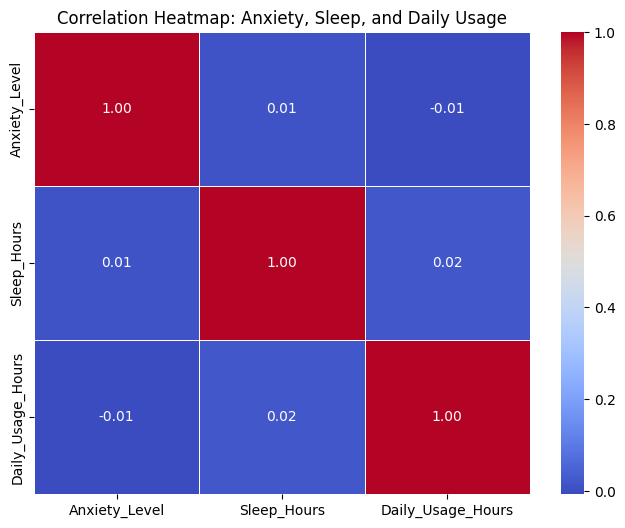

In [19]:
corr = data[['Anxiety_Level', 'Sleep_Hours', 'Daily_Usage_Hours']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap: Anxiety, Sleep, and Daily Usage")
plt.show()

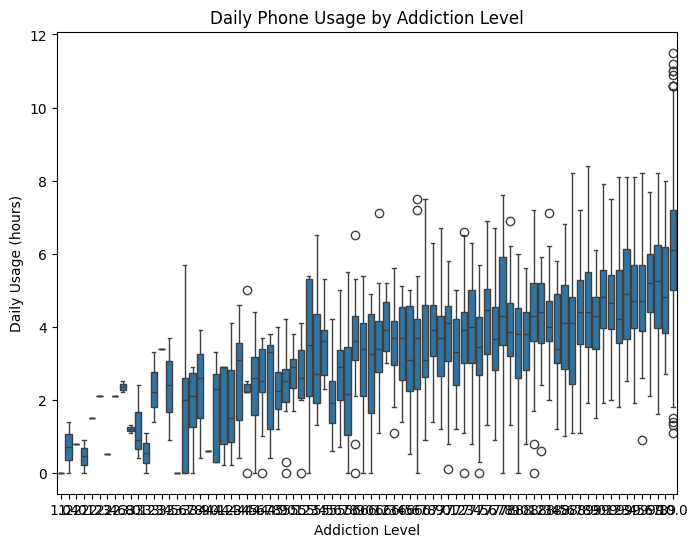

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Addiction_Level', y='Daily_Usage_Hours', data=data)

plt.title("Daily Phone Usage by Addiction Level")
plt.xlabel("Addiction Level")
plt.ylabel("Daily Usage (hours)")
plt.show()

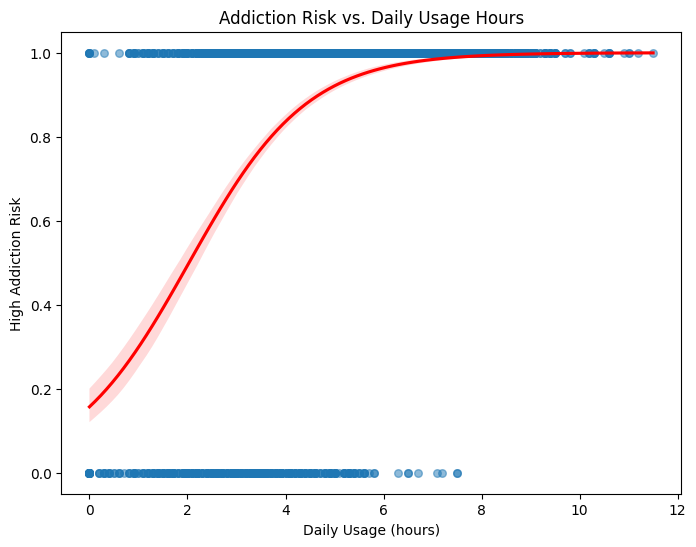

In [26]:
#Linearna regresija
plt.figure(figsize=(8, 6))
sns.regplot(x='Daily_Usage_Hours', y='High_Addiction_Risk', data=data, logistic=True, scatter_kws={'s': 30, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.title("Addiction Risk vs. Daily Usage Hours")
plt.xlabel("Daily Usage (hours)")
plt.ylabel("High Addiction Risk")
plt.show()